# Analyse de données


In [358]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import seaborn as sns
import numpy as np

import math
from __future__ import division
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

from sklearn import tree, linear_model
from sklearn.metrics import r2_score


In [359]:
df = pd.read_csv("kc_house_data.csv")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


* noms de collonnes

In [360]:
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

* taile de DataFraime

In [361]:
df.shape

(21613, 21)

* Statistiques

In [362]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [363]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

## Anomalies détectées

Anomalie #1:
33 chambres

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

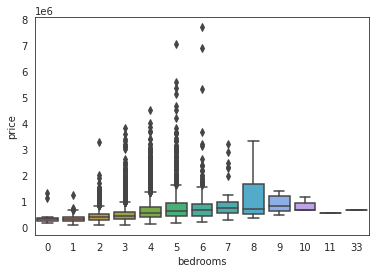

In [364]:
sns.boxplot(y = 'price', x = 'bedrooms', data = df)

In [365]:
prix33 = df['price'].loc[(df['bedrooms']==33)]

print("le prix de la maison de 33 chambres est égal à : ", df['price'].loc[(df['bedrooms']==33)] )

print("le prix moyen des maisons est égal à : ", df['price'].mean())

print("le prix moyen d'une maisons de 3 chambres est égal à : ", df['price'].loc[(df['bedrooms']==3)].mean())
print("le prix moyen d'une maisons de 4 chambres est égal à : ", df['price'].loc[(df['bedrooms']==4)].mean())
print("le prix moyen d'une maisons de 5 chambres est égal à : ", df['price'].loc[(df['bedrooms']==5)].mean())

print("Code postal de la maison de 33 chambres est : ", df['zipcode'].loc[(df['bedrooms']==33)])
df['price'].loc[(df['zipcode']==98103) & (df['bedrooms']==3)].mean()
print("le prix moyen d'une maisons avec la code postal = 98106 et  de 3 chambres est égal à ", 
                        df['price'].loc[(df['zipcode']==98103) & (df['bedrooms']==3)].mean())
print("le prix moyen d'une maisons avec la code postal = 98106 et  de 4 chambres est égal à ", 
                        df['price'].loc[(df['zipcode']==98103) & (df['bedrooms']==4)].mean())
print("la surface de la maisons avec 33 chambres est égal à ", 
                        df['sqft_living'].loc[(df['zipcode']==98103) & (df['bedrooms']==33)].mean())                     
print("la surface d'une maisons avec la code postal = 98106 et  de 3 chambres est égal à ", 
                        df['sqft_living'].loc[(df['zipcode']==98103) & (df['bedrooms']==3)].mean())


df['zipcode'].loc[(df['bedrooms']==33)]

le prix de la maison de 33 chambres est égal à :  15870    640000.0
Name: price, dtype: float64
le prix moyen des maisons est égal à :  540088.1417665294
le prix moyen d'une maisons de 3 chambres est égal à :  466232.07848127035
le prix moyen d'une maisons de 4 chambres est égal à :  635419.5042138913
le prix moyen d'une maisons de 5 chambres est égal à :  786599.8288569644
Code postal de la maison de 33 chambres est :  15870    98103
Name: zipcode, dtype: int64
le prix moyen d'une maisons avec la code postal = 98106 et  de 3 chambres est égal à  559541.8657243816
le prix moyen d'une maisons avec la code postal = 98106 et  de 4 chambres est égal à  750799.0566037736
la surface de la maisons avec 33 chambres est égal à  1620.0
la surface d'une maisons avec la code postal = 98106 et  de 3 chambres est égal à  1614.0318021201413


15870    98103
Name: zipcode, dtype: int64

on peut remplacer le nombre chambres du 33 par 3

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

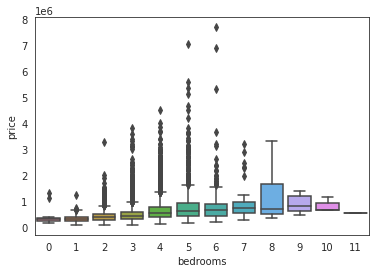

In [366]:
df.loc[df['bedrooms']==33, ['bedrooms']] = 3
sns.boxplot(y = 'price', x = 'bedrooms', data = df)

Anomalie #2:
l'absence de bedrooms

In [367]:
df_bedrooms = df.query('bedrooms <=0')
df_bedrooms.shape[0]
print("nombre de maisons avec les salles de baines manquantes : ", df_bedrooms.shape[0] )

nombre de maisons avec les salles de baines manquantes :  13


On peut les remplacer par le nombre moyen 

<AxesSubplot:xlabel='bedrooms', ylabel='price'>

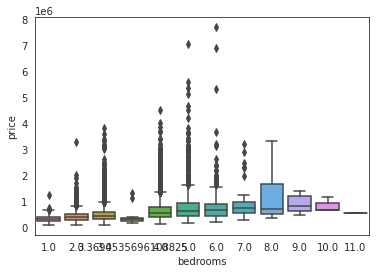

In [368]:
df.loc[df['bedrooms']==0, ['bedrooms']] = df['bedrooms'].mean()
sns.boxplot(y = 'price', x = 'bedrooms', data = df)

Anomalie #3:
l'absence de salles de bains

<AxesSubplot:xlabel='bathrooms', ylabel='price'>

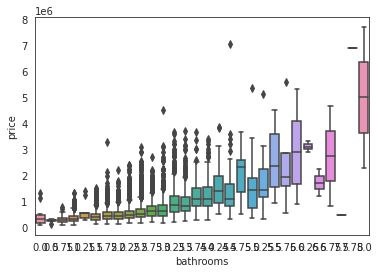

In [369]:
sns.boxplot(y = 'price', x = 'bathrooms', data = df)

In [370]:
df_bathrooms = df.query('bathrooms <=0')
df_bathrooms.shape[0]
print("nombre de maisons avec les salles de baines manquantes : ", df_bathrooms.shape[0] )
#on peut les remplacer par les valeurs moyennes

nombre de maisons avec les salles de baines manquantes :  10


<AxesSubplot:xlabel='bathrooms', ylabel='price'>

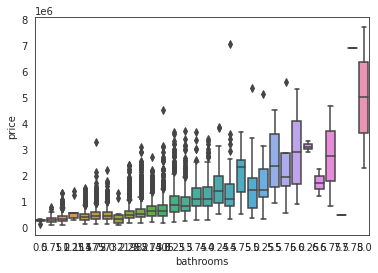

In [371]:
df.loc[df['bathrooms']==0, ['bathrooms']] = df['bathrooms'].mean()
sns.boxplot(y = 'price', x = 'bathrooms', data = df)

* Verification s'il y a des valeurs manquantes

In [372]:
df.isnull().sum() #pas de valeurs manquantes

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

* Verification s'il y a des doublants

In [373]:
print("Nombre de dublicat 'id': ", sum(df.duplicated(subset = ['id']))) #

Nombre de dublicat 'id':  177


In [374]:
df_renov = df['yr_renovated'] > 1000
df_renov.value_counts()

False    20699
True       914
Name: yr_renovated, dtype: int64

* Modification du format de la colonne "date"

In [375]:
df['date_corr'] = df['date'].str[:8]

In [376]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date_corr
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0,98178,47.5112,-122.257,1340,5650,20141013
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639,20141209
2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,0,...,770,0,1933,0,98028,47.7379,-122.233,2720,8062,20150225
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0,98136,47.5208,-122.393,1360,5000,20141209
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0,98074,47.6168,-122.045,1800,7503,20150218


In [377]:
df['date_corr'] = pd.to_datetime(df['date_corr'], format='%Y%m%d', errors='ignore')

In [378]:
df = df.drop(['date'], axis = 1)


In [379]:
df.rename(columns = {'date_corr':'date'}, inplace = True)

In [380]:
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month

df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,date,year,month
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,1955,0,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,1951,1991,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,1933,0,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,1965,0,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,1987,0,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3.0,2.50,1530,1131,3.0,0,0,3,...,2009,0,98103,47.6993,-122.346,1530,1509,2014-05-21,2014,5
21609,6600060120,400000.0,4.0,2.50,2310,5813,2.0,0,0,3,...,2014,0,98146,47.5107,-122.362,1830,7200,2015-02-23,2015,2
21610,1523300141,402101.0,2.0,0.75,1020,1350,2.0,0,0,3,...,2009,0,98144,47.5944,-122.299,1020,2007,2014-06-23,2014,6
21611,291310100,400000.0,3.0,2.50,1600,2388,2.0,0,0,3,...,2004,0,98027,47.5345,-122.069,1410,1287,2015-01-16,2015,1


* Création d'une nouvelle colonne "house_age"

In [381]:
df["house_age"] = df["date"].dt.year - df['yr_built']
df['renovated'] = df['yr_renovated'].apply(lambda yr: 0 if yr == 0 else 1)


df=df.drop('yr_renovated', axis=1)
df=df.drop('yr_built', axis=1)
df.head(5)

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,year,month,house_age,renovated
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,98178,47.5112,-122.257,1340,5650,2014-10-13,2014,10,59,0
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,98125,47.7210,-122.319,1690,7639,2014-12-09,2014,12,63,1
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,98028,47.7379,-122.233,2720,8062,2015-02-25,2015,2,82,0
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,98136,47.5208,-122.393,1360,5000,2014-12-09,2014,12,49,0
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,98074,47.6168,-122.045,1800,7503,2015-02-18,2015,2,28,0


* Creation une liste avec toutes les codes postales

In [382]:
df_zipecode = df['zipcode'].unique()
df_zipecode.shape

(70,)

In [383]:
df_zipecode

array([98178, 98125, 98028, 98136, 98074, 98053, 98003, 98198, 98146,
       98038, 98007, 98115, 98107, 98126, 98019, 98103, 98002, 98133,
       98040, 98092, 98030, 98119, 98112, 98052, 98027, 98117, 98058,
       98001, 98056, 98166, 98023, 98070, 98148, 98105, 98042, 98008,
       98059, 98122, 98144, 98004, 98005, 98034, 98075, 98116, 98010,
       98118, 98199, 98032, 98045, 98102, 98077, 98108, 98168, 98177,
       98065, 98029, 98006, 98109, 98022, 98033, 98155, 98024, 98011,
       98031, 98106, 98072, 98188, 98014, 98055, 98039])

* Coefficients pearsons puor toutes les valeurs

In [384]:
df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,year,month,house_age,renovated
id,1.000000,-0.016762,0.002527,0.005233,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,...,-0.005151,-0.008224,-0.001891,0.020799,-0.002901,-0.138798,0.010128,-0.011708,-0.021217,-0.016943
price,-0.016762,1.000000,0.315956,0.525738,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,...,0.323816,-0.053203,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081,-0.053951,0.126092
bedrooms,0.002527,0.315956,1.000000,0.527541,0.593030,0.033437,0.183793,-0.006832,0.082491,0.023594,...,0.309288,-0.158226,-0.011389,0.135467,0.404477,0.031629,-0.009133,-0.000877,-0.160958,0.018935
bathrooms,0.005233,0.525738,0.527541,1.000000,0.755372,0.087929,0.502132,0.063744,0.188341,-0.126197,...,0.283428,-0.204819,0.024246,0.224921,0.569467,0.087539,-0.026433,0.007374,-0.507298,0.050081
sqft_living,-0.012258,0.702035,0.593030,0.755372,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,...,0.435043,-0.199430,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810,-0.318488,0.055094
sqft_lot,-0.132109,0.089661,0.033437,0.087929,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,...,0.015286,-0.129574,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369,-0.052990,0.007745
floors,0.018525,0.256794,0.183793,0.502132,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,...,-0.245705,-0.059121,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005,-0.489640,0.006260
waterfront,-0.002721,0.266369,-0.006832,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,...,0.080588,0.030285,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132,0.026093,0.093294
view,0.011592,0.397293,0.082491,0.188341,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,...,0.276947,0.084827,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638,0.053458,0.104062
condition,-0.023783,0.036362,0.023594,-0.126197,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,...,0.174105,0.003026,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978,0.360665,-0.060139


In [385]:
mask = np.zeros_like(df.corr())


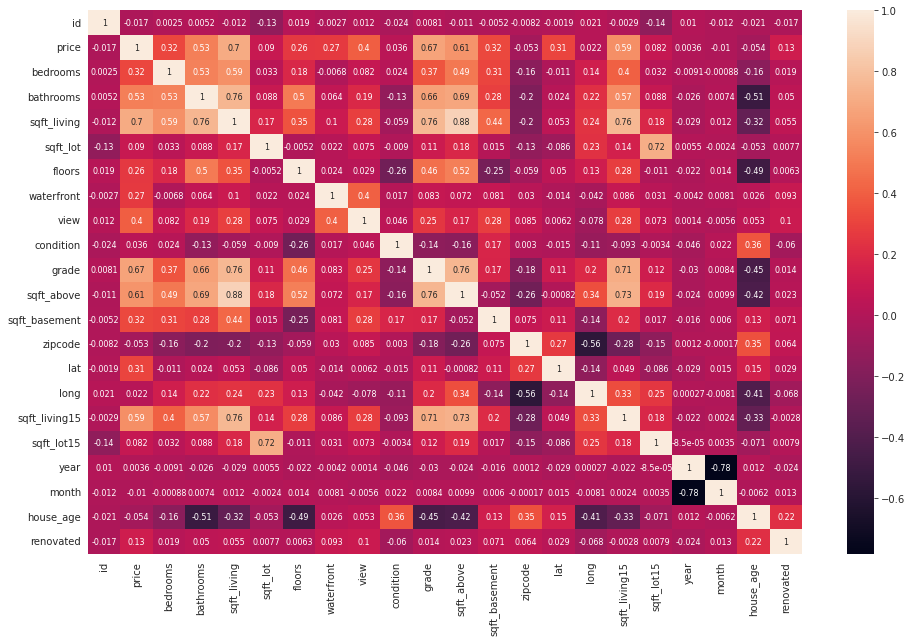

In [386]:
plt.figure(figsize=(16,10))
sns.heatmap(df.corr(), mask = mask, annot = True, annot_kws={"size":8})
sns.set_style('white')

plt.show
plt.savefig("corr.png")

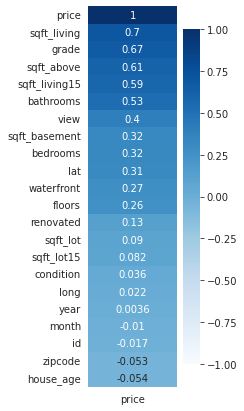

In [387]:
plt.figure(figsize=(2, 7))
heatmap = sns.heatmap(df.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

In [388]:
df1 = df.copy()
df1.loc[df1['zipcode']==98004]

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,year,month,house_age,renovated
66,3394100030,975000.0,4.0,2.50,2720,11049,2.0,0,0,3,...,98004,47.5815,-122.192,2750,11049,2014-09-09,2014,9,25,0
69,1802000060,1325000.0,5.0,2.25,3200,20158,1.0,0,0,3,...,98004,47.6303,-122.215,3390,20158,2014-06-12,2014,6,49,0
103,2450000295,1088000.0,3.0,2.50,2920,8113,2.0,0,0,3,...,98004,47.5814,-122.196,2370,8113,2014-10-07,2014,10,64,1
125,4389200955,1450000.0,4.0,2.75,2750,17789,1.5,0,0,3,...,98004,47.6141,-122.212,3060,11275,2015-03-02,2015,3,101,1
269,7960900060,2900000.0,4.0,3.25,5050,20100,1.5,0,2,3,...,98004,47.6312,-122.223,3890,20060,2015-05-04,2015,5,33,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21473,8085400586,1750000.0,4.0,2.75,3560,8975,2.0,0,0,3,...,98004,47.6322,-122.209,3440,12825,2014-11-01,2014,11,0,0
21530,8964800330,3000000.0,4.0,3.75,5090,14823,1.0,0,0,3,...,98004,47.6200,-122.207,3030,12752,2015-04-07,2015,4,2,0
21533,524059322,999999.0,3.0,2.50,2100,4097,2.0,0,0,3,...,98004,47.5983,-122.200,1780,4764,2015-02-26,2015,2,7,0
21568,524059330,1700000.0,4.0,3.50,3830,8963,2.0,0,0,3,...,98004,47.5990,-122.197,2190,10777,2015-01-30,2015,1,1,0


* Prix par rapport au code postal

In [389]:
df_zip_price = df.groupby(['zipcode']).mean().sort_values(by=['price'], ascending = False)
df_zip_price

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,lat,long,sqft_living15,sqft_lot15,year,month,house_age,renovated
zipcode,,,,,,,,,,,,,,,,,,,,,
98039,3.755708e+09,2.160607e+06,4.060000,3.200000,3800.900000,17403.560000,1.560000,0.020000,0.440000,3.480000,...,3290.900000,510.000000,47.625840,-122.233540,3132.200000,17291.100000,2014.260000,6.980000,41.740000,0.200000
98004,4.394237e+09,1.355927e+06,3.854890,2.527603,2909.022082,13104.220820,1.432177,0.003155,0.305994,3.495268,...,2419.842271,489.179811,47.616183,-122.205189,2674.700315,12805.022082,2014.337539,6.353312,42.867508,0.104101
98040,4.199323e+09,1.194230e+06,4.028369,2.716312,3106.833333,13704.464539,1.505319,0.042553,0.783688,3.787234,...,2474.329787,632.503546,47.559846,-122.225592,2898.744681,12801.283688,2014.304965,6.453901,42.833333,0.117021
98112,4.826282e+09,1.095499e+06,3.509294,2.373606,2498.743494,4990.431227,1.806691,0.000000,0.148699,3.516729,...,2005.695167,493.048327,47.629619,-122.297866,2280.078067,4898.159851,2014.275093,6.762082,69.825279,0.111524
98102,4.123034e+09,9.012583e+05,3.251138,2.282045,2159.742857,3616.190476,2.004762,0.000000,0.171429,3.371429,...,1764.933333,394.809524,47.634607,-122.322248,1958.333333,3310.133333,2014.257143,7.028571,61.733333,0.057143
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
98148,5.579459e+09,2.849086e+05,3.140351,1.793860,1610.526316,8960.719298,1.210526,0.000000,0.000000,3.070175,...,1486.491228,124.035088,47.437437,-122.329316,1611.228070,8812.385965,2014.315789,6.578947,51.052632,0.017544
98001,4.664787e+09,2.808047e+05,3.393286,2.012057,1900.856354,14937.450276,1.429558,0.000000,0.102210,3.337017,...,1721.325967,179.530387,47.309020,-122.270646,1828.856354,11214.403315,2014.323204,6.560773,33.643646,0.022099
98032,4.548921e+09,2.512962e+05,3.392000,1.708000,1738.048000,10379.760000,1.220000,0.000000,0.080000,3.632000,...,1434.320000,303.728000,47.373556,-122.278848,1668.632000,9271.928000,2014.304000,6.800000,48.840000,0.016000


In [390]:
df_zip_price.describe().T

,count,mean,std,min,25%,50%,75%,max
id,70.0,4.493957e+09,7.558647e+08,2.817516e+09,4.129336e+09,4.433061e+09,4.897578e+09,7.393758e+09
price,70.0,5.607737e+05,3.023069e+05,2.342840e+05,3.541261e+05,4.919520e+05,6.454384e+05,2.160607e+06
bedrooms,70.0,3.370742e+00,2.707029e-01,2.782792e+00,3.195525e+00,3.370555e+00,3.519631e+00,4.060000e+00
bathrooms,70.0,2.119909e+00,3.034628e-01,1.433086e+00,1.903172e+00,2.100000e+00,2.288603e+00,3.200000e+00
sqft_living,70.0,2.098071e+03,4.345417e+02,1.468625e+03,1.784766e+03,2.033363e+03,2.313551e+03,3.800900e+03
sqft_lot,70.0,1.831405e+04,2.184326e+04,3.194368e+03,6.257296e+03,1.056454e+04,1.731897e+04,1.017248e+05
floors,70.0,1.487138e+00,2.015774e-01,1.159851e+00,1.344460e+00,1.458672e+00,1.621350e+00,2.004762e+00
waterfront,70.0,9.210620e-03,2.635580e-02,0.000000e+00,0.000000e+00,0.000000e+00,7.980528e-03,2.033898e-01
view,70.0,2.515297e-01,2.348927e-01,0.000000e+00,7.597015e-02,1.781414e-01,3.632855e-01,1.084746e+00
condition,70.0,3.409152e+00,1.774071e-01,3.045161e+00,3.307095e+00,3.395368e+00,3.512679e+00,3.787234e+00


* Prix moyen par année

In [391]:
df_year_price = df.groupby(['year']).mean().sort_values(by=['price'], ascending = False)
df_year_price.reset_index()

,year,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,zipcode,lat,long,sqft_living15,sqft_lot15,month,house_age,renovated
0,2015,4.622485e+09,541988.992264,3.359524,2.086312,2041.285100,15434.917192,1.476862,0.007020,0.235817,...,1759.827937,281.457163,98078.031948,47.554192,-122.213841,1964.984527,12765.097564,3.045415,43.845702,0.035387
1,2014,4.560180e+09,539181.428415,3.377183,2.129771,2098.319073,14950.534272,1.502631,0.007791,0.233582,...,1802.015240,296.303834,98077.895852,47.562848,-122.213923,1996.840498,12770.057473,8.257774,43.066015,0.045582


In [392]:
df_year_price['price'][2015]

541988.9922636104

* Calcul de l'inflation

In [393]:
price_2014 = df['price'].loc[(df['year']==2014)].mean()
print("Le prix moyen de l'année 2014 est égale à :", price_2014)

price_2015 = df['price'].loc[(df['year']==2015)].mean()
print("Le prix moyen de l'année 2015 est égale à :", price_2015)

inflation = (price_2015 - price_2014)/price_2014*100
print('Inflation calculéé est égale à :',round(inflation, 2),"%")
print("Inflation mésurée est égale à : 1.6 %")
##https://www.inflation.eu/fr/taux-de-inflation/etats-unis/inflation-historique/ipc-inflation-etats-unis-2014.aspx

Le prix moyen de l'année 2014 est égale à : 539181.4284152258
Le prix moyen de l'année 2015 est égale à : 541988.9922636104
Inflation calculéé est égale à : 0.52 %
Inflation mésurée est égale à : 1.6 %


* Correlation entre le prix et les séasons

In [394]:
price_2014_hiver = df['price'].loc[(df['year']==2014) & (df["month"]>=1) & (df["month"]<3)].mean()
print("Le prix moyen pour la période 01/2014 - 03/2014 est égal à :",price_2014_hiver)

price_2014_printemps = df['price'].loc[(df['year']==2014) & (df["month"]>=3) & (df["month"]<6)].mean()
print("Le prix moyen pour la période 03/2014 - 05/2014 est égal à :",price_2014_printemps)

price_2014_ete = df['price'].loc[(df['year']==2014) & (df["month"]>=6) & (df["month"]<=8)].mean()
print("Le prix moyen pour la période 06/2014 - 08/2014 est égal à :", price_2014_ete)

price_2014_automne = df['price'].loc[(df['year']==2014) & (df["month"]>=9) & (df["month"]<=11)].mean()
print("Le prix moyen pour la période 09/2014 - 11/2014 est égal à :", price_2014_automne)

price_2014_décembre = df['price'].loc[(df['year']==2014)  & (df["month"]==12)].mean()
print("Le prix moyen pour le mois de décembre 12/2014 est égal à :", price_2014_décembre)

Le prix moyen pour la période 01/2014 - 03/2014 est égal à : nan
Le prix moyen pour la période 03/2014 - 05/2014 est égal à : 548080.2765837105
Le prix moyen pour la période 06/2014 - 08/2014 est égal à : 546781.9601958616
Le prix moyen pour la période 09/2014 - 11/2014 est égal à : 530846.5172822437
Le prix moyen pour le mois de décembre 12/2014 est égal à : 524461.8667573079


In [395]:
price_2015_hiver = df['price'].loc[(df['year']==2015) & (df["month"]>=1) & (df["month"]<3)].mean()
print("Le prix moyen pour la période 01/2015 - 03/2015 est égal à :",price_2015_hiver)

price_2015_printemps = df['price'].loc[(df['year']==2015) & (df["month"]>=3) & (df["month"]<6)].mean()
print("Le prix moyen pour la période 03/2015 - 05/2015 est égal à :",price_2015_printemps)

price_2015_ete = df['price'].loc[(df['year']==2015) & (df["month"]>=6) & (df["month"]<=8)].mean()
print("Le prix moyen pour la période 06/2015 - 08/2015 est égal à :", price_2015_ete)


Le prix moyen pour la période 01/2015 - 03/2015 est égal à : 515761.1956912029
Le prix moyen pour la période 03/2015 - 05/2015 est égal à : 554286.0315656565
Le prix moyen pour la période 06/2015 - 08/2015 est égal à : nan


* Modification le type de données de la code postal en object

In [396]:
df['zipcode']=df["zipcode"].astype(object)


In [397]:
df_all_zip = df.copy()
df_all_zip["zipcode"].astype('object')
df_all_zip.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   price          21613 non-null  float64       
 2   bedrooms       21613 non-null  float64       
 3   bathrooms      21613 non-null  float64       
 4   sqft_living    21613 non-null  int64         
 5   sqft_lot       21613 non-null  int64         
 6   floors         21613 non-null  float64       
 7   waterfront     21613 non-null  int64         
 8   view           21613 non-null  int64         
 9   condition      21613 non-null  int64         
 10  grade          21613 non-null  int64         
 11  sqft_above     21613 non-null  int64         
 12  sqft_basement  21613 non-null  int64         
 13  zipcode        21613 non-null  object        
 14  lat            21613 non-null  float64       
 15  long           2161

In [398]:
df_all_zip = pd.get_dummies(df_all_zip)

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/pandas/core/algorithms.py:798: FutureWarning:

In a future version, the Index constructor will not infer numeric dtypes when passed object-dtype sequences (matching Series behavior)



In [399]:
df_all_zip.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
0,7129300520,221900.0,3.0,1.00,1180,5650,1.0,0,0,3,...,0,0,0,0,0,0,1,0,0,0
1,6414100192,538000.0,3.0,2.25,2570,7242,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
2,5631500400,180000.0,2.0,1.00,770,10000,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
3,2487200875,604000.0,4.0,3.00,1960,5000,1.0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
4,1954400510,510000.0,3.0,2.00,1680,8080,1.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0


* Coefficients pearson puor tous les codes postaux

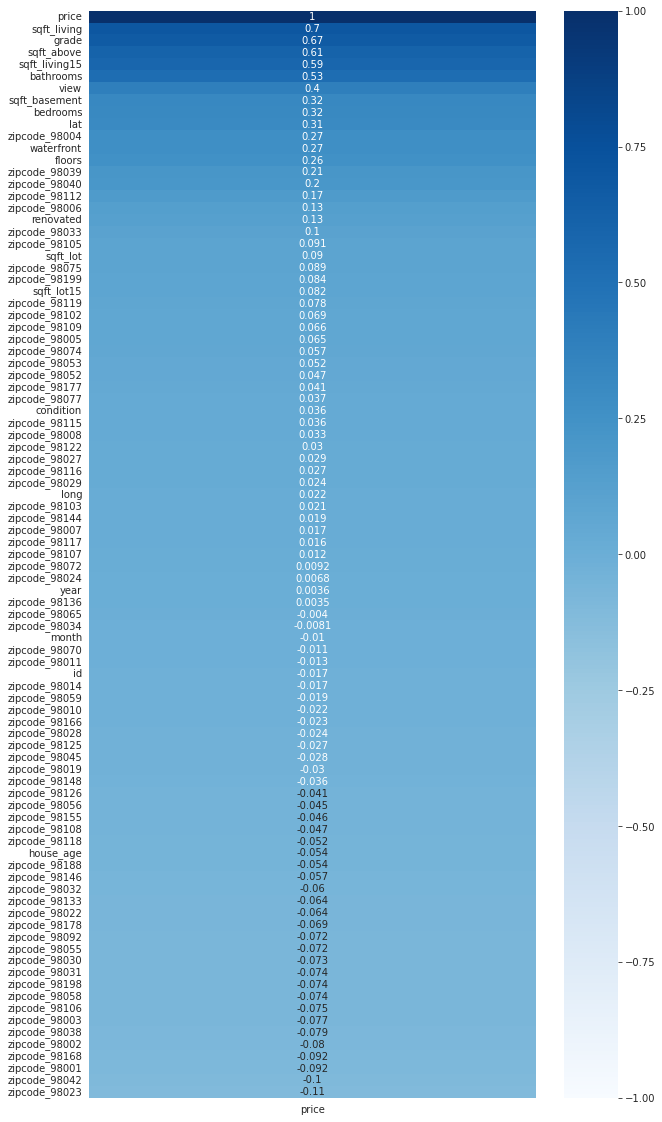

In [400]:
plt.figure(figsize=(10, 20))
heatmap = sns.heatmap(df_all_zip.corr()[['price']].sort_values(by='price', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Blues')

plt.savefig("corr_prix_zipcode.png")

In [401]:
mask = np.zeros_like(df_all_zip.corr())

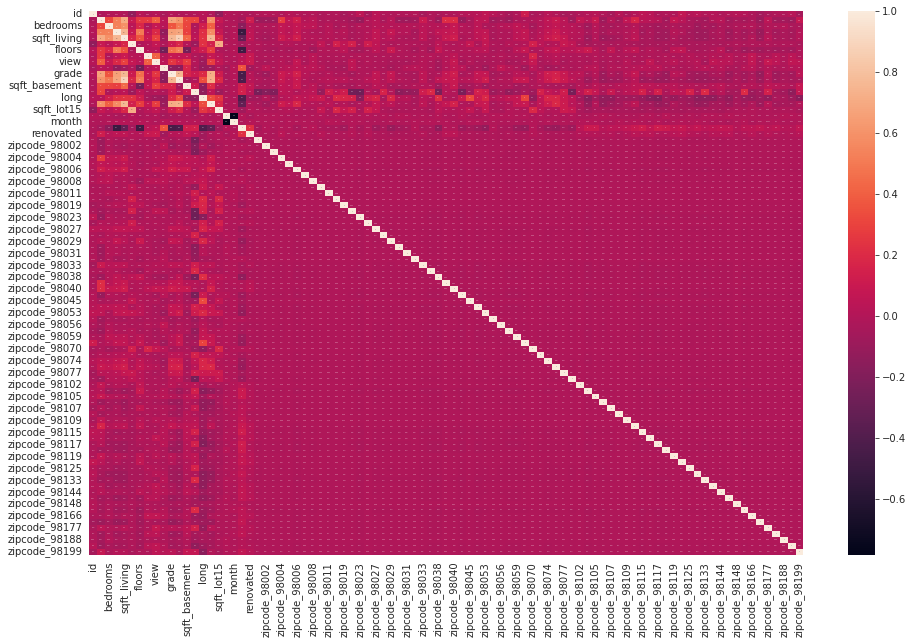

In [402]:
plt.figure(figsize=(16,10))
sns.heatmap(df_all_zip.corr(), mask = mask, annot = True, annot_kws={"size":1})
sns.set_style('white')

plt.show
plt.savefig("corr_zipcode.png")

# Visualisation les maisons sur la carte

In [403]:
import plotly.express as px


In [404]:

fig = px.scatter_mapbox(
    df,
    lat="lat", lon="long",
    color="price", opacity=.5, size="price",
    zoom=8.5,
    mapbox_style="carto-positron", 
    color_continuous_scale=px.colors.cyclical.IceFire
)
fig.update_layout(margin={"r": 0, "t": 0, "l": 0, "b": 0})

### Visualisation le prix par rapport à toutes les valeurs

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

/home/marina/miniconda3/envs/msp/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning:

`distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functio

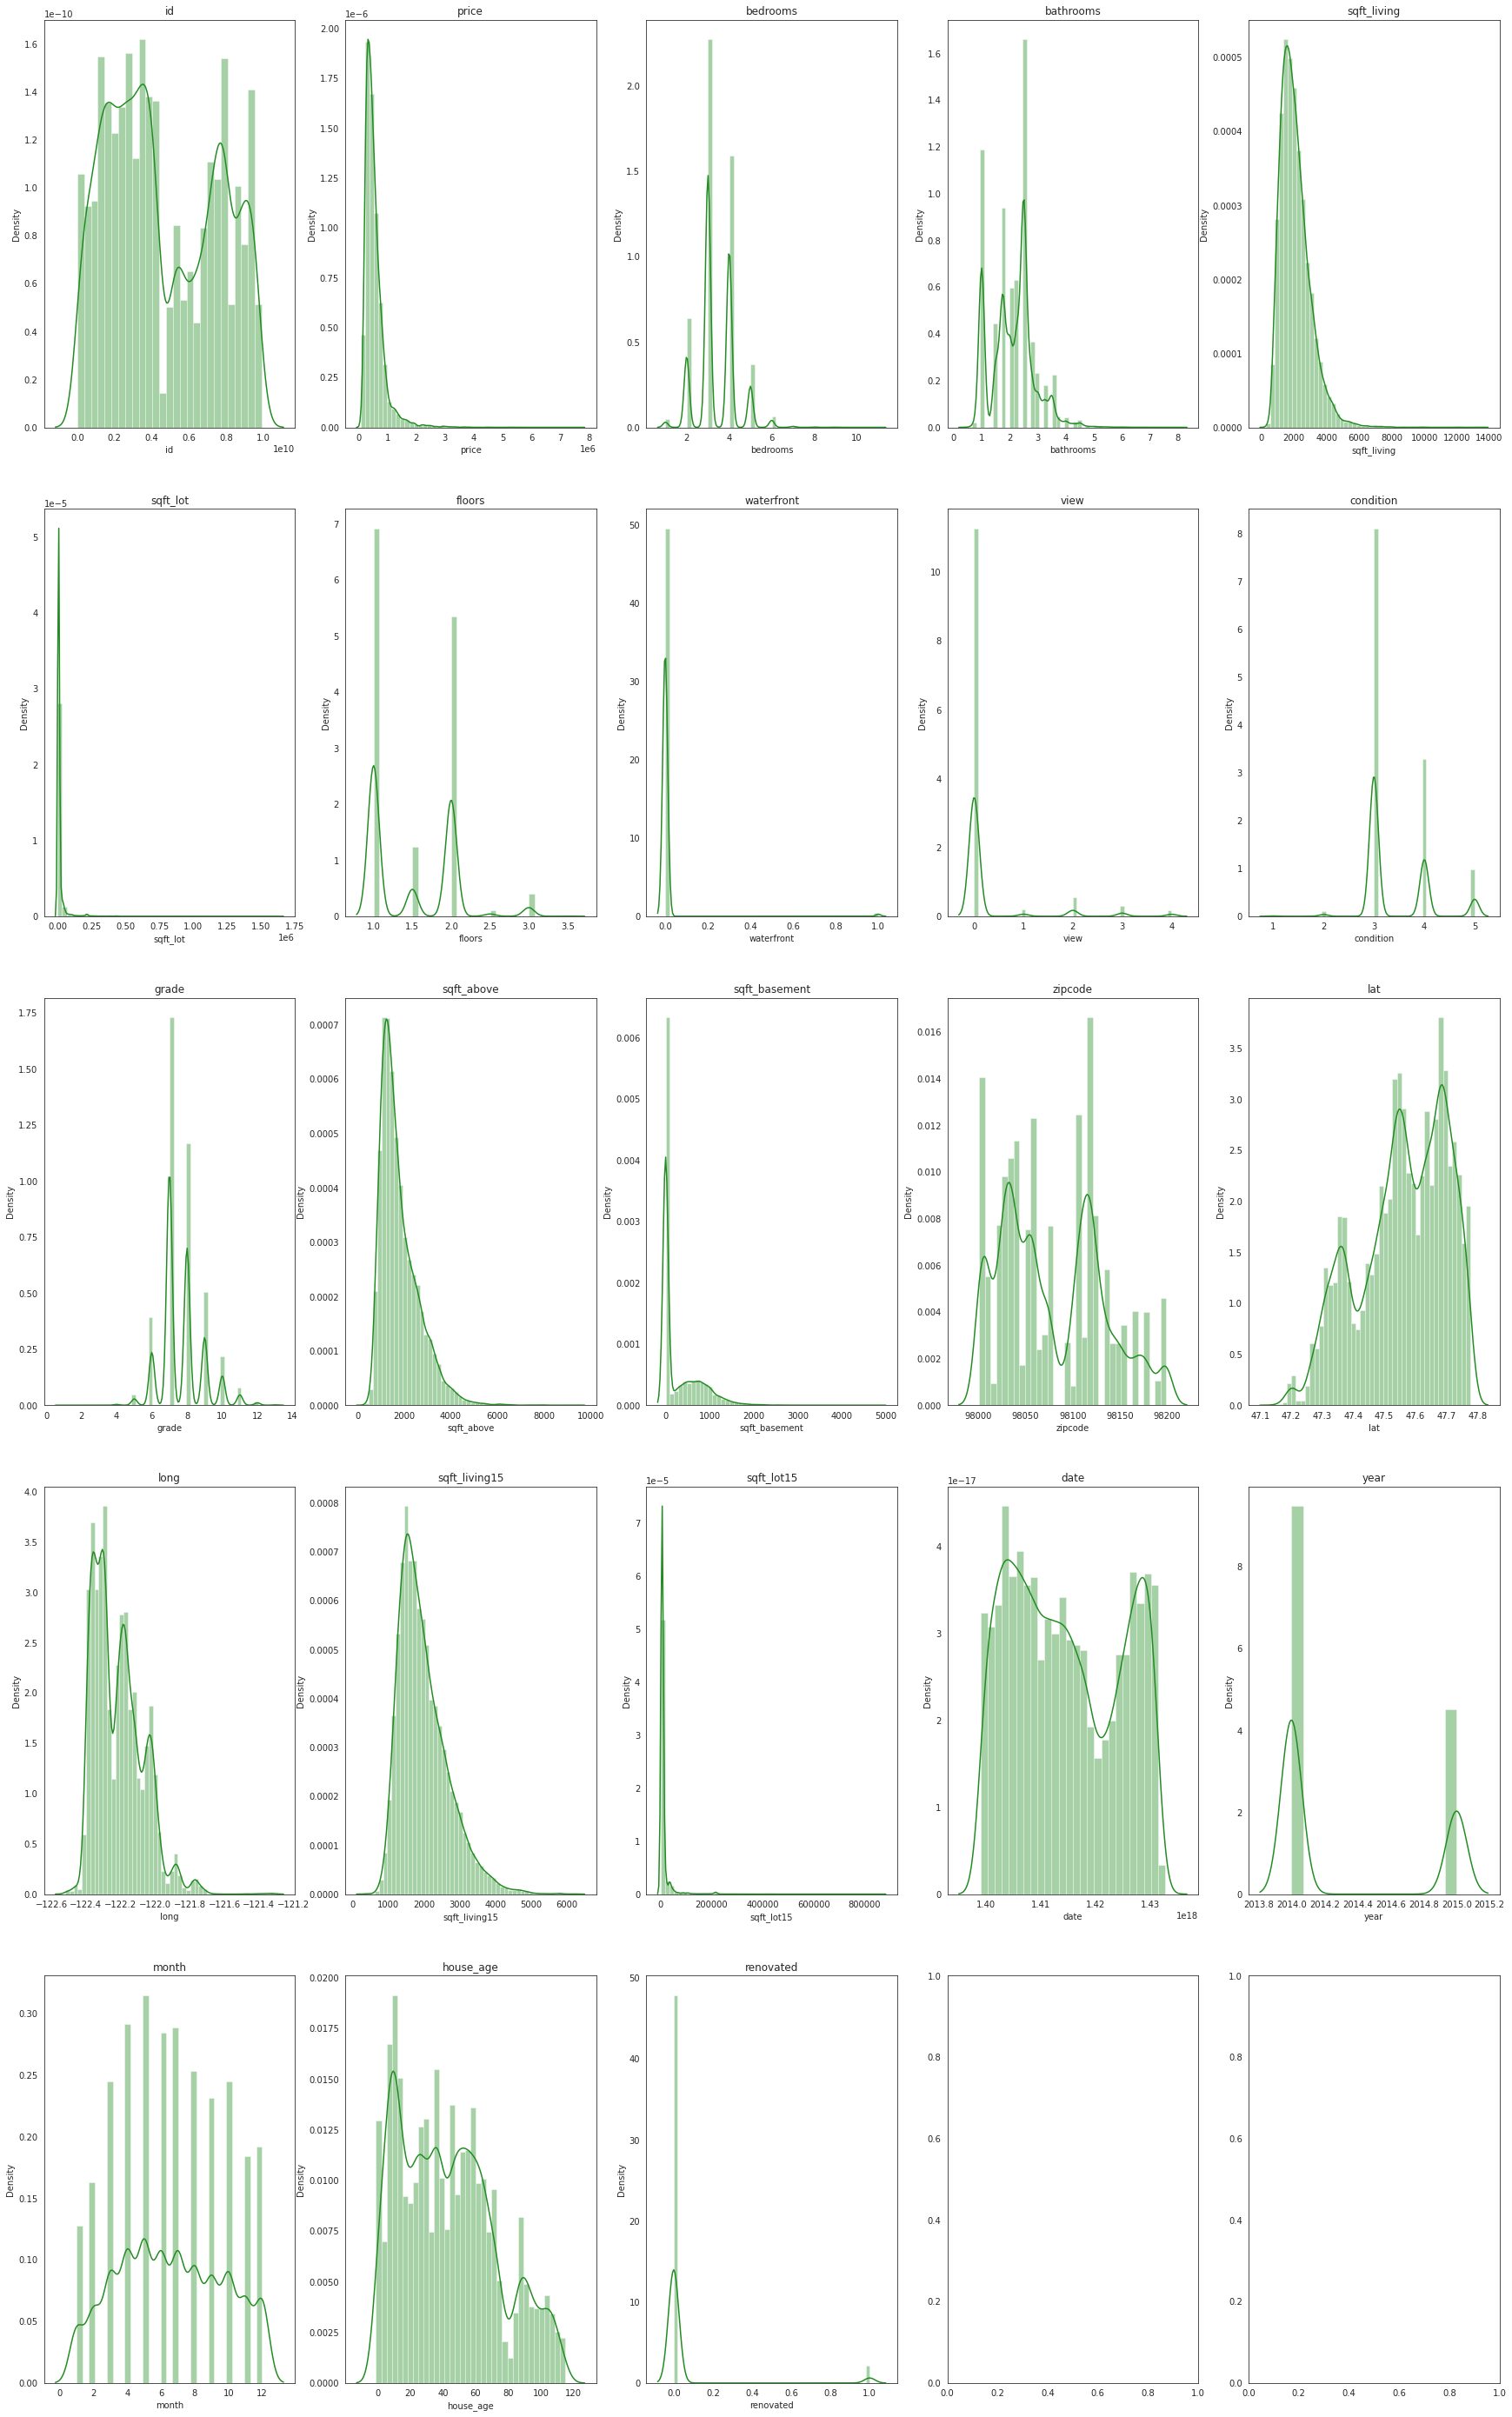

In [405]:
fig, axes = plt.subplots(nrows = 5, ncols = 5)    # axes is 2d array (3x3)
axes = axes.flatten()         # Convert axes to 1d array of length 9
fig.set_size_inches(30, 50)

for ax, col in zip(axes, df.columns):
  sns.distplot(df[col], ax = ax, color='forestgreen')
  ax.set_title(col)


* Distribustion des prix : le graphique ressemble à une distribution normale, mais à droite, il y a des données qui le déforment (~1%)

In [406]:
len(df)*0.01

216.13

In [407]:
df_final = df.sort_values(['price'], ascending=False).iloc[216:]
df_final.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode,lat,long,sqft_living15,sqft_lot15,date,year,month,house_age,renovated
3281,8964800025,1965000.0,5.0,3.75,3940,13738,1.5,0,3,4,...,98004,47.6203,-122.212,2370,13320,2015-02-26,2015,2,64,0
12577,2806300065,1960000.0,4.0,4.00,4430,31353,2.0,0,0,3,...,98005,47.6422,-122.157,3900,35237,2015-04-22,2015,4,17,0
12283,1923000260,1959000.0,5.0,4.50,6200,23373,3.0,0,1,4,...,98040,47.5632,-122.215,3700,14486,2014-10-15,2014,10,26,0
1152,4055701200,1955000.0,4.0,2.75,3120,7898,1.0,1,4,4,...,98034,47.7165,-122.259,2630,13868,2015-04-21,2015,4,52,0
9175,3124059023,1955000.0,3.0,1.75,3330,12566,1.0,1,4,4,...,98040,47.5287,-122.220,3730,16560,2015-02-13,2015,2,55,0


In [408]:
df_final_zip = df_all_zip.sort_values(['price'], ascending=False).iloc[216:]
df_final_zip.head()



,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,zipcode_98146,zipcode_98148,zipcode_98155,zipcode_98166,zipcode_98168,zipcode_98177,zipcode_98178,zipcode_98188,zipcode_98198,zipcode_98199
3281,8964800025,1965000.0,5.0,3.75,3940,13738,1.5,0,3,4,...,0,0,0,0,0,0,0,0,0,0
12577,2806300065,1960000.0,4.0,4.00,4430,31353,2.0,0,0,3,...,0,0,0,0,0,0,0,0,0,0
12283,1923000260,1959000.0,5.0,4.50,6200,23373,3.0,0,1,4,...,0,0,0,0,0,0,0,0,0,0
1152,4055701200,1955000.0,4.0,2.75,3120,7898,1.0,1,4,4,...,0,0,0,0,0,0,0,0,0,0
9175,3124059023,1955000.0,3.0,1.75,3330,12566,1.0,1,4,4,...,0,0,0,0,0,0,0,0,0,0


In [409]:
#df_final_zip.to_csv(r'df_final_zip.csv', index = False, header = True)